In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
sleep_efficiency=pd.read_csv("./Sleep_Efficiency.csv")
sleep_efficiency.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [91]:
#Print the number of NaNs in each column
cols=sleep_efficiency.columns
print('Nan Counts:')
for column in cols:
    print(column+": ",sleep_efficiency[column].isna().sum())
    

Nan Counts:
ID:  0
Age:  0
Gender:  0
Bedtime:  0
Wakeup time:  0
Sleep duration:  0
Sleep efficiency:  0
REM sleep percentage:  0
Deep sleep percentage:  0
Light sleep percentage:  0
Awakenings:  20
Caffeine consumption:  25
Alcohol consumption:  14
Smoking status:  0
Exercise frequency:  6


In [92]:
sleep_efficiency.dropna(axis=0,subset=["Caffeine consumption","Alcohol consumption","Exercise frequency"],inplace=True)
#Drop rows with NaNs in the columns that will affect my visualization.

In [93]:
sleep_efficiency.describe()

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,388.000000,407.000000,407.000000,407.00000
mean,226.823096,40.823096,7.466830,0.789730,22.692875,52.739558,24.567568,1.618557,23.034398,1.162162,1.77887
std,128.852068,13.321273,0.880554,0.135078,3.403349,15.586434,15.324719,1.355958,28.977974,1.607631,1.44701
min,1.000000,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.00000
25%,115.000000,29.000000,7.000000,0.700000,20.000000,51.000000,15.000000,1.000000,0.000000,0.000000,0.00000
50%,230.000000,41.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,2.00000
75%,337.000000,52.000000,8.000000,0.900000,25.000000,63.000000,26.000000,3.000000,50.000000,2.000000,3.00000
max,452.000000,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.00000


In [94]:
sleep_efficiency.nunique()

ID                        407
Age                        60
Gender                      2
Bedtime                   382
Wakeup time               393
Sleep duration              9
Sleep efficiency           50
REM sleep percentage       13
Deep sleep percentage      28
Light sleep percentage     28
Awakenings                  5
Caffeine consumption        6
Alcohol consumption         6
Smoking status              2
Exercise frequency          6
dtype: int64

In [95]:
#Question: What are the factors that affect sleep efficiency? Elaborate on the role of gender in any/all of the factors.

In [96]:
print(sleep_efficiency[sleep_efficiency['Age']<=18]['Sleep efficiency'].describe())
print(sleep_efficiency[(sleep_efficiency['Age']>=18) & (sleep_efficiency['Age']<=40)]['Sleep efficiency'].describe())
print(sleep_efficiency[(sleep_efficiency['Age']>=40) & (sleep_efficiency['Age']<=60)]['Sleep efficiency'].describe())
print(sleep_efficiency[sleep_efficiency['Age']>=60]['Sleep efficiency'].describe())


count    14.000000
mean      0.637143
std       0.100875
min       0.520000
25%       0.565000
50%       0.620000
75%       0.672500
max       0.850000
Name: Sleep efficiency, dtype: float64
count    194.000000
mean       0.785773
std        0.141009
min        0.500000
25%        0.710000
50%        0.830000
75%        0.900000
max        0.980000
Name: Sleep efficiency, dtype: float64
count    189.000000
mean       0.805291
std        0.128951
min        0.500000
25%        0.720000
50%        0.840000
75%        0.910000
max        0.990000
Name: Sleep efficiency, dtype: float64
count    34.000000
mean      0.754706
std       0.123785
min       0.520000
25%       0.662500
50%       0.730000
75%       0.875000
max       0.980000
Name: Sleep efficiency, dtype: float64


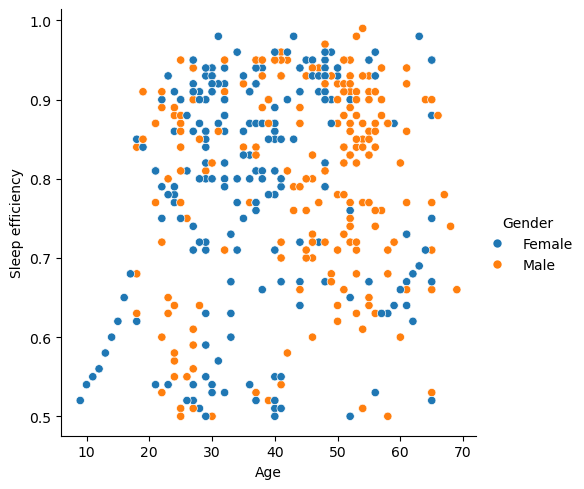

In [97]:
#Age vs Sleep Efficiency on a Scatter Plot
sns.relplot(data=sleep_efficiency,
    x="Age",
    y="Sleep efficiency",
    hue="Gender" 
)

In [98]:
sleep_efficiency.groupby("Alcohol consumption")['Sleep efficiency'].value_counts()

Alcohol consumption  Sleep efficiency
0.0                  0.90                15
                     0.95                15
                     0.87                14
                     0.93                14
                     0.91                13
                                         ..
5.0                  0.73                 1
                     0.86                 1
                     0.88                 1
                     0.91                 1
                     0.93                 1
Name: count, Length: 166, dtype: int64

In [99]:
sleep_efficiency.groupby("Caffeine consumption")['Sleep efficiency'].value_counts()

Caffeine consumption  Sleep efficiency
0.0                   0.93                14
                      0.95                12
                      0.90                11
                      0.87                 9
                      0.77                 8
                                          ..
75.0                  0.98                 1
100.0                 0.90                 1
200.0                 0.81                 1
                      0.95                 1
                      0.96                 1
Name: count, Length: 143, dtype: int64

In [100]:
sleep_efficiency.groupby("Exercise frequency")['Sleep efficiency'].value_counts()

Exercise frequency  Sleep efficiency
0.0                 0.73                6
                    0.67                5
                    0.86                5
                    0.55                4
                    0.64                4
                                       ..
5.0                 0.52                1
                    0.85                1
                    0.87                1
                    0.92                1
                    0.93                1
Name: count, Length: 168, dtype: int64

In [101]:
sleep_efficiency.groupby("REM sleep percentage")['Sleep efficiency'].value_counts()

REM sleep percentage  Sleep efficiency
15                    0.80                2
                      0.84                2
                      0.52                1
                      0.81                1
                      0.85                1
                                         ..
28                    0.93                1
30                    0.94                2
                      0.95                2
                      0.53                1
                      0.93                1
Name: count, Length: 224, dtype: int64

In [102]:
sleep_efficiency['Age Group'] = pd.cut(
    sleep_efficiency['Age'],
    bins=[0, 25, 50, 75],
    labels=['0-25', '26-50', '51-75'],
    right=True
)

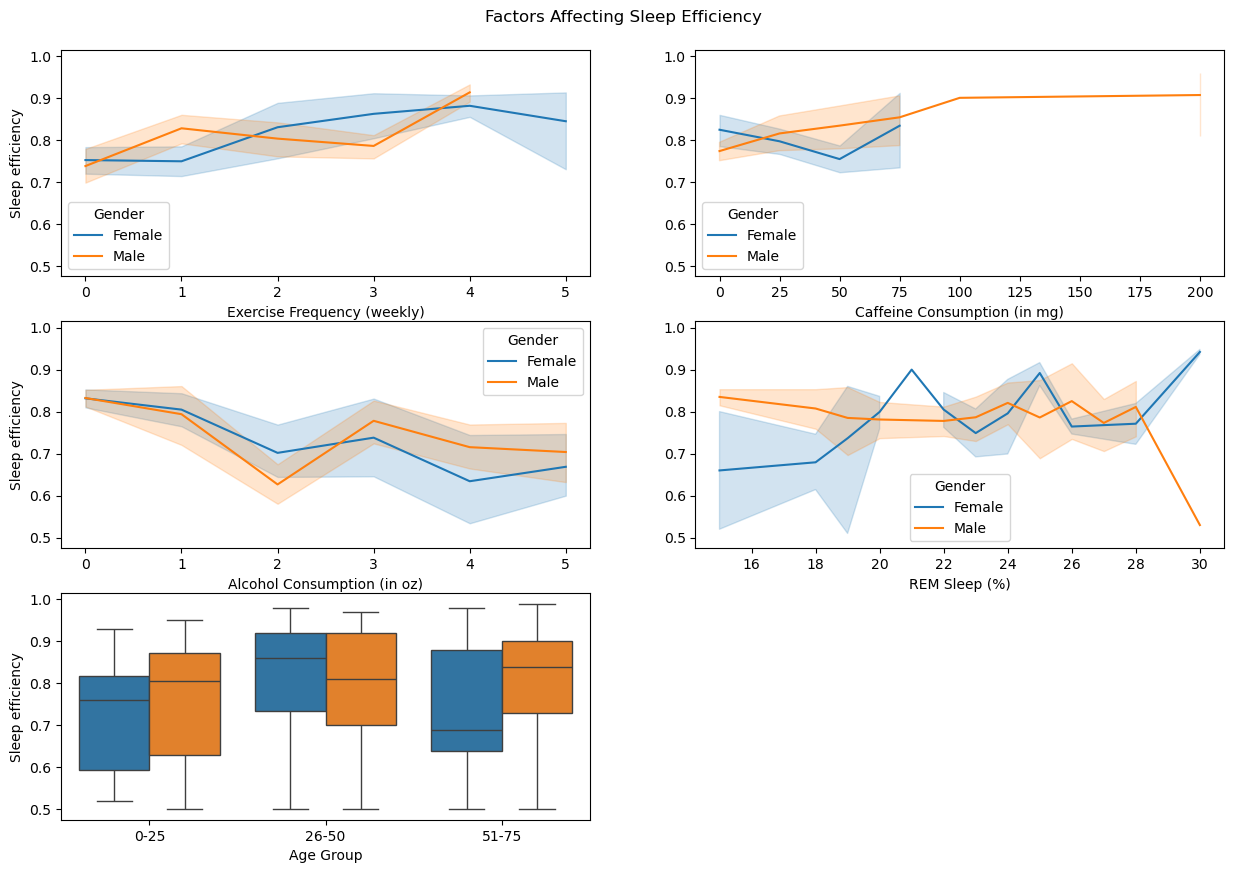

In [103]:
fig,axs=plt.subplots(3,2,figsize=(15,10),sharey=True) 

sns.lineplot(data=sleep_efficiency,
    x="Caffeine consumption",
    y="Sleep efficiency",
    hue="Gender",
    ax=axs[0][1]
)

sns.lineplot(data=sleep_efficiency,
    x="Exercise frequency",
    y="Sleep efficiency",
    hue="Gender",
   ax=axs[0][0]
)

sns.lineplot(data=sleep_efficiency,
        x="Alcohol consumption",
        y="Sleep efficiency",
        hue="Gender",
        ax=axs[1][0]
)

sns.lineplot(data=sleep_efficiency,
    x="REM sleep percentage",
    y="Sleep efficiency",
    hue="Gender",
    ax=axs[1][1]
)

sns.boxplot(data=sleep_efficiency,
    x="Age Group",
    y="Sleep efficiency",
    hue="Gender",
    ax=axs[2][0],
    legend=False,
)

axs[2][1].axis("off")


axs[0][1].set_xlabel("Caffeine Consumption (in mg)")
axs[0][0].set_xlabel("Exercise Frequency (weekly)")
axs[1][0].set_xlabel("Alcohol Consumption (in oz)")
axs[1][1].set_xlabel("REM Sleep (%)")
fig.suptitle("Factors Affecting Sleep Efficiency",x=0.5,y=0.92);

for ax in axs.flat:
    ax.tick_params(axis="y", labelleft=True)


